In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel(r"C:\Users\kjk66\Downloads\유입유량.xlsx")
df = df.drop(['location', 't', 'date', 'time'], axis=1)

In [3]:
df = pd.read_excel(r"C:\Users\kjk66\Downloads\유입유량.xlsx")
df = df.drop(['location', 't', 'date', 'time'], axis=1)
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# 정규화
sds = StandardScaler()
df['value'] = sds.fit(df[['value']]).transform(df[['value']])

# 트레인, 테스트 분리
split = 20160
df_train = df.iloc[:split]
df_test = df.iloc[split:]

df_train_y = df_train.loc[:,'value']
df_train_x = df_train.drop(['datetime', 'value'], axis=1)
df_test_y = df_test.loc[:,'value']
df_test_x = df_test.drop(['datetime', 'value'], axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['hour', 'dayofweek', 'value']]

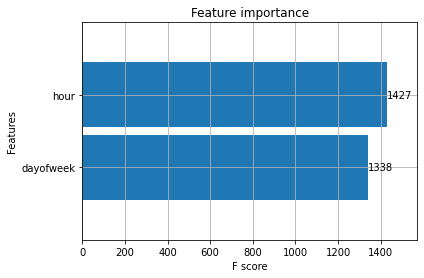

In [4]:
XG_model = xgb.XGBRegressor(n_estimators=1000)
XG_model.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

plot_importance(XG_model, height=0.9);

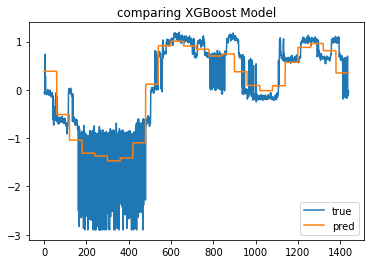

In [5]:
pred = XG_model.predict(df_test_x)
true = df_test_y.reset_index(drop=True).to_numpy()
plt.title("comparing XGBoost Model")

plt.plot(true)
plt.plot(pred)
plt.legend(['true', 'pred']);

In [6]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(true, pred)

0.3591342378088126